In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns

In [3]:
import graph_tool as gt
from graph_tool.all import graph_draw,Graph  

In [7]:
g = Graph()
v1 = g.add_vertex()
v2 = g.add_vertex()
e = g.add_edge(v1, v2)

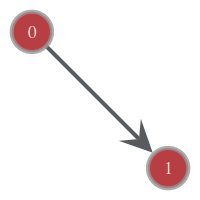

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x126fa9610, at 0x126f99ed0>

In [8]:
graph_draw(g, vertex_text=g.vertex_index, vertex_font_size=18,
    output_size=(200, 200))

## Build our graph

In [9]:
df_orig = pandas.read_csv("Data/NEWSSOURCE with standardized names.csv", index_col=0, dtype={'QKEY': str})

In [10]:
values = df_orig.values

In [11]:
from itertools import izip

def pairwise(iterable):
    "s -> (s0, s1), (s2, s3), (s4, s5), ..."
    a = iter(iterable)
    return izip(a, a)


graph = {}
for ls in values:
    for p1,p2 in pairwise(ls):
        p1 = p1.decode('utf-8', 'ignore').encode('utf-8')
        if p1 not in graph.keys():
            graph[p1] = {}
        if p2 not in graph[p1].keys():
            graph[p1][p2] = {}
            graph[p1][p2]['weight'] = 1
        else:
            graph[p1][p2]['weight'] += 1
            

In [12]:
import copy
pruned = copy.deepcopy(graph)

In [13]:
for p1 in pruned.keys():
    for p2 in pruned[p1].keys():
        if pruned[p1][p2]['weight'] == 1:
            #print p1, p2
            pruned[p1].pop(p2, None)

Bleacher Report BBC
Bleacher Report ESPN
Bleacher Report MovieWeb
Politicus USA Salon Magazine
Investopedia .
ESPN Deadspin
ESPN ESPN
ESPN Huffington Post
ESPN Slate
ESPN The Daily Beast
ESPN SB Nation
ESPN Redskins radio
ESPN Facebook
ESPN Scores
ESPN Patriots.com
ESPN NBA
ESPN NFL 
ESPN Yahoo!
Direct Action Everywhere .
Lawyers Guns & Money Blog FiveThirtyEight
ABC 7 FOX 11
ABC 7 Los Angeles Times
KPLC oil city news
Trumbull Times .
The Daily Signal .
3Ders.org .
The Oregonian Do not remember
BeFrugal .
Enoch Pratt Free Library .
Local ABC affiliate New York Times
Western Journalism Conservative Tribune
Western Journalism .
Western Journalism Fox News
Western Journalism Franklin Graham
Western Journalism Independent Journal Review
Smithsonian .
WBAL TV .
Cleveland 19 News .
Anti aging breakthrough Ex president of Mexico
Oswego Renaissance .
Patriot-News ABC
FOX Sports ESPN
KAKE CNN
WEEI ESPN
Mental Floss Stephen Colbert
Mental Floss ThinkProgress
Mental Floss .
Courier?Post .
GQ .
Ol

In [14]:
for p1 in pruned.keys():
    for p2 in pruned[p1].keys():
        if p2 == {}:
            pruned[p1].pop(p2, None)

        
for p1 in pruned.keys():
    if pruned[p1].keys() == []:
        print p1
        pruned.pop(p1, None)

Politicus USA
Investopedia
Direct Action Everywhere
Lawyers Guns & Money Blog
ABC 7
KPLC
Trumbull Times
The Daily Signal
3Ders.org
The Oregonian
BeFrugal
Enoch Pratt Free Library
Local ABC affiliate
Western Journalism
Smithsonian
WBAL TV
Cleveland 19 News
Anti aging breakthrough
Oswego Renaissance
Patriot-News
KAKE
Mental Floss
Courier?Post
GQ
Ola
AFLCIO
Marketplace
WDBJ
FOX 28 - WSJV
Iowa Hawkeyes football
Crain's Houston Business
Channel 7 news
RedState
IrishCentral
Fort Worth Star?Telegram
Badass Teachers
NBC Nightly News
FOX 8 News
HLN to Go
WMUR
Gizmodo
imgur
WSLS
raspberrypi.org
WGME?TV
MLive
Climate Home
Hillary Clinton
Ohio Rising
ABC 36 WTVQ
Hootsuite
TuneIn
Local government
PolitiFact
VoteTexas.gov
KDRV
Conservative News Outlet
Tech insider
McSweeny's
Local 10 News
Amazon
Code.org
Goldstar
KDKA-TV
guns
Milwaukee Journal Sentinel
Steezy
PGA Tour
Christ plus
Sporting News
Plunder Design
KTLA? 5
Marcorubio.com
Indy Week
The Truth About Guns
Wait tv
Food52
99th
GridWise Architect

## Now make graph-tool graph from dict of dicts

In [17]:
#test
pruned[pruned.keys()[0]]

{'.': {'weight': 12}}

In [ ]:
from itertools import izip
from numpy.random import randint

g = Graph()
g.add_vertex(100)
# insert some random links
for s,t in izip(randint(0, 100, 100), randint(0, 100, 100)):
    g.add_edge(g.vertex(s), g.vertex(t))

vprop_double = g.new_vertex_property("double")            # Double-precision floating point
vprop_double[g.vertex(10)] = 3.1416

vprop_vint = g.new_vertex_property("vector<int>")         # Vector of ints
vprop_vint[g.vertex(40)] = [1, 3, 42, 54]

eprop_dict = g.new_edge_property("object")                # Arbitrary python object.
eprop_dict[g.edges().next()] = {"foo": "bar", "gnu": 42}  # In this case, a dict.

gprop_bool = g.new_edge_property("bool")                  # Boolean
gprop_bool[g] = True

In [19]:
g = Graph()
 
v1 = g.add_vertex()
v